In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
import glob
import os
import jsonpickle

In [22]:
# get all files under src/round1
files = glob.glob('src/round3/round-3-island-data-bottle/*.csv')
files

['src/round3/round-3-island-data-bottle\\prices_round_3_day_0.csv',
 'src/round3/round-3-island-data-bottle\\prices_round_3_day_1.csv',
 'src/round3/round-3-island-data-bottle\\prices_round_3_day_2.csv',
 'src/round3/round-3-island-data-bottle\\trades_round_3_day_0_nn.csv',
 'src/round3/round-3-island-data-bottle\\trades_round_3_day_1_nn.csv',
 'src/round3/round-3-island-data-bottle\\trades_round_3_day_2_nn.csv']

In [23]:
prices = []
for file in files:
    if 'prices' in file:
        prices.append(pd.read_csv(file,sep=';',index_col=0))
prices = pd.concat(prices).sort_values(['day','timestamp']).reset_index()

In [24]:
prices.set_index(['day','timestamp'],inplace=True)

In [25]:
prices

product  bid_price_1  bid_volume_1  bid_price_2  \
day timestamp                                                         
0   0             CHOCOLATE         7999           111          NaN   
    0          STRAWBERRIES         3999           210          NaN   
    0                 ROSES        14999            72          NaN   
    0           GIFT_BASKET        71348            19      71347.0   
    100         GIFT_BASKET        71344             1      71343.0   
...                     ...          ...           ...          ...   
2   999800      GIFT_BASKET        69537             2      69536.0   
    999900        CHOCOLATE         7749           143          NaN   
    999900      GIFT_BASKET        69551             1      69550.0   
    999900     STRAWBERRIES         3984           240          NaN   
    999900            ROSES        14411            59          NaN   

               bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
day timestamp                                                         
0   0                   NaN          NaN           NaN         8001   
    0                   NaN          NaN           NaN         4001   
    0                   NaN          NaN           NaN        15001   
    0                  24.0          NaN           NaN        71362   
    100                12.0      71342.0          20.0        71355   
...                     ...          ...           ...          ...   
2   999800             18.0      69535.0          24.0        69547   
    999900              NaN          NaN           NaN         7751   
    999900             19.0      69549.0          20.0        69561   
    999900              NaN          NaN           NaN         3985   
    999900              NaN          NaN           NaN        14412   

               ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  \
day timestamp                                                         
0   0                   111          NaN           NaN          NaN   
    0                   210          NaN           NaN          NaN   
    0                    72          NaN           NaN          NaN   
    0                    19      71363.0          24.0          NaN   
    100                   1      71356.0          12.0      71357.0   
...                     ...          ...           ...          ...   
2   999800                2      69548.0          18.0      69550.0   
    999900              143          NaN           NaN          NaN   
    999900                1      69562.0          19.0      69564.0   
    999900               92       3986.0         148.0          NaN   
    999900               59          NaN           NaN          NaN   

               ask_volume_3  mid_price  profit_and_loss  
day timestamp                                            
0   0                   NaN     8000.0              0.0  
    0                   NaN     4000.0              0.0  
    0                   NaN    15000.0              0.0  
    0                   NaN    71355.0              0.0  
    100                20.0    71349.5              0.0  
...                     ...        ...              ...  
2   999800             24.0    69542.0              0.0  
    999900              NaN     7750.0              0.0  
    999900             20.0    69556.0              0.0  
    999900              NaN     3984.5              0.0  
    999900              NaN    14411.5              0.0  

[120000 rows x 15 columns]

In [26]:
prices[prices['product']=='GIFT_BASKET']

product  bid_price_1  bid_volume_1  bid_price_2  \
day timestamp                                                        
0   0          GIFT_BASKET        71348            19      71347.0   
    100        GIFT_BASKET        71344             1      71343.0   
    200        GIFT_BASKET        71344             4      71339.0   
    300        GIFT_BASKET        71345             2      71343.0   
    400        GIFT_BASKET        71336             2      71335.0   
...                    ...          ...           ...          ...   
2   999500     GIFT_BASKET        69528            20      69527.0   
    999600     GIFT_BASKET        69523            14      69522.0   
    999700     GIFT_BASKET        69537            13      69536.0   
    999800     GIFT_BASKET        69537             2      69536.0   
    999900     GIFT_BASKET        69551             1      69550.0   

               bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
day timestamp                                                         
0   0                  24.0          NaN           NaN        71362   
    100                12.0      71342.0          20.0        71355   
    200                 1.0      71338.0          14.0        71350   
    300                11.0      71342.0          29.0        71356   
    400                13.0      71334.0          25.0        71347   
...                     ...          ...           ...          ...   
2   999500             23.0          NaN           NaN        69541   
    999600             23.0          NaN           NaN        69536   
    999700             17.0          NaN           NaN        69549   
    999800             18.0      69535.0          24.0        69547   
    999900             19.0      69549.0          20.0        69561   

               ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  \
day timestamp                                                         
0   0                    19      71363.0          24.0          NaN   
    100                   1      71356.0          12.0      71357.0   
    200                   1      71351.0          14.0      71352.0   
    300                   2      71357.0          11.0      71358.0   
    400                   2      71348.0          13.0      71349.0   
...                     ...          ...           ...          ...   
2   999500               20      69542.0          23.0          NaN   
    999600               14      69537.0          23.0          NaN   
    999700               13      69551.0          17.0          NaN   
    999800                2      69548.0          18.0      69550.0   
    999900                1      69562.0          19.0      69564.0   

               ask_volume_3  mid_price  profit_and_loss  
day timestamp                                            
0   0                   NaN    71355.0              0.0  
    100                20.0    71349.5              0.0  
    200                21.0    71347.0              0.0  
    300                29.0    71350.5              0.0  
    400                25.0    71341.5              0.0  
...                     ...        ...              ...  
2   999500              NaN    69534.5              0.0  
    999600              NaN    69529.5              0.0  
    999700              NaN    69543.0              0.0  
    999800             24.0    69542.0              0.0  
    999900             20.0    69556.0              0.0  

[30000 rows x 15 columns]

In [7]:
component_total=4*prices[prices['product']=='CHOCOLATE']['mid_price']+6*prices[prices['product']=='STRAWBERRIES']['mid_price']+prices[prices['product']=='ROSES']['mid_price']

<Axes: xlabel='day,timestamp'>

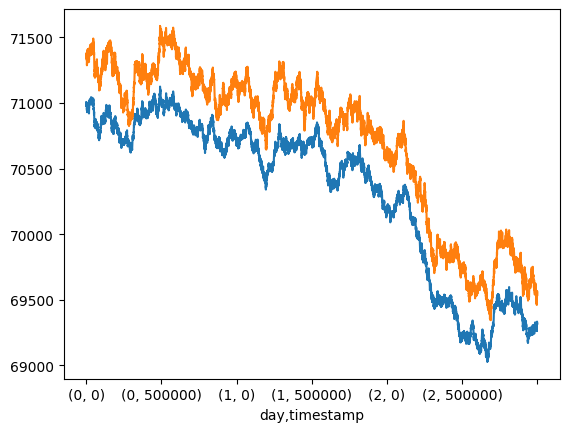

In [8]:
component_total.plot()
prices[prices['product']=='GIFT_BASKET']['mid_price'].plot()

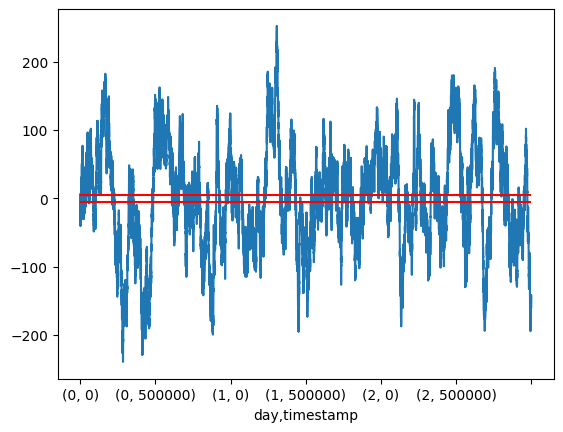

In [30]:
spread = prices[prices['product']=='GIFT_BASKET']['mid_price']-component_total
(spread-spread.mean()).plot()
plt.hlines(5,0,spread.shape[0],colors='r')
plt.hlines(-5,0,spread.shape[0],colors='r')

In [28]:
(spread-spread.mean()).std()

76.42438217375009

In [10]:
spread.mean()

379.4904833333333

In [32]:
mid_price_all = prices.pivot_table(columns='product',values='mid_price',index=['day','timestamp'])

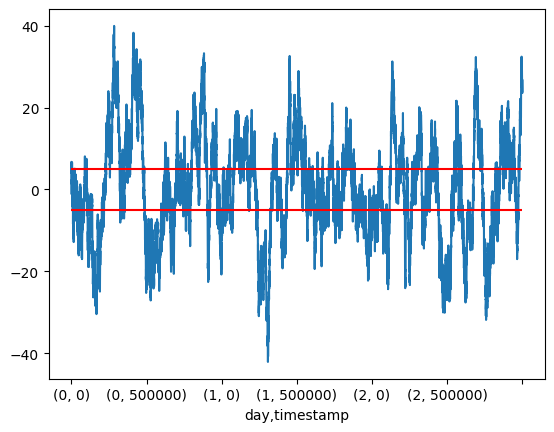

In [34]:
(mid_price_all['STRAWBERRIES']-(mid_price_all['GIFT_BASKET']-4*mid_price_all['CHOCOLATE']-mid_price_all['ROSES']-379.49)/6).plot()
plt.hlines(5,0,spread.shape[0],colors='r')
plt.hlines(-5,0,spread.shape[0],colors='r')

<Axes: xlabel='day,timestamp'>

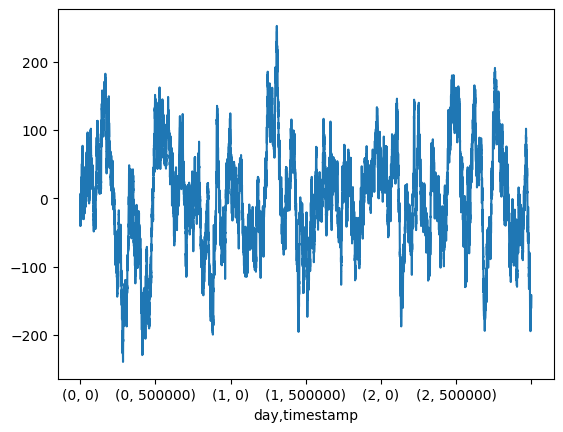

In [18]:
(spread-379.49).plot()

# Round 2 Orchids

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import jsonpickle

In [60]:
# get all files under src/round1
files = glob.glob('src/round2/*.csv')
files

['src/round2\\prices_round_2_day_-1.csv',
 'src/round2\\prices_round_2_day_0.csv',
 'src/round2\\prices_round_2_day_1.csv']

In [61]:
prices = []
for file in files:
    if 'prices' in file:
        print(file)
        prices.append(pd.read_csv(file, sep=';', index_col=0))
prices = pd.concat(prices)

src/round2\prices_round_2_day_-1.csv
src/round2\prices_round_2_day_0.csv
src/round2\prices_round_2_day_1.csv


In [67]:
prices

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
timestamp,,,,,,,
0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1
...,...,...,...,...,...,...,...
999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1
999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1
999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1


In [72]:
prices = prices.sort_values(['DAY','timestamp']).reset_index().set_index(['DAY','timestamp'])

In [77]:
prices

ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
DAY timestamp                                                          
-1  0          1200.00             1.5           10.5           -2.0   
    100        1201.75             1.5            9.5           -2.0   
    200        1201.75             1.5            9.5           -2.0   
    300        1201.75             1.5            9.5           -2.0   
    400        1201.75             1.5            9.5           -2.0   
...                ...             ...            ...            ...   
 1  999600     1036.25             0.9            9.5           -5.0   
    999700     1036.25             0.9            9.5           -5.0   
    999800     1036.25             0.9            9.5           -5.0   
    999900     1034.25             0.9            9.5           -5.0   
    1000000    1035.25             0.9            9.5           -5.0   

                SUNLIGHT  HUMIDITY  
DAY timestamp                       
-1  0          2500.0000  79.00000  
    100        2499.4197  79.00410  
    200        2498.8457  79.00821  
    300        2498.2780  79.01234  
    400        2497.7166  79.01649  
...                  ...       ...  
 1  999600     2299.9436  69.93549  
    999700     2299.9556  69.95153  
    999800     2299.9690  69.96762  
    999900     2299.9840  69.98378  
    1000000    2300.0000  70.00000  

[30003 rows x 6 columns]

TypeError: fill_between() missing 1 required positional argument: 'y1'

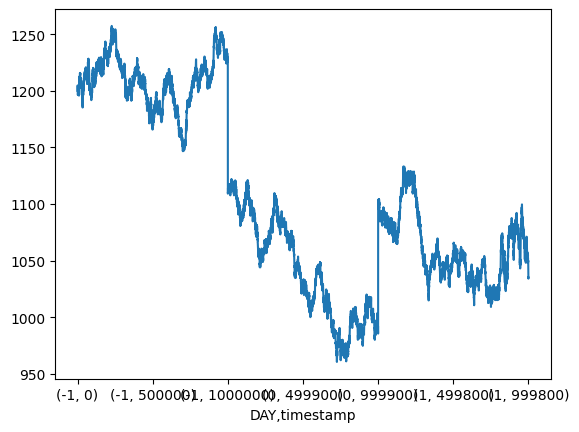

In [80]:
prices['ORCHIDS'].plot()
# color the first 100 ticks


In [87]:
from utils import ols

In [147]:
import warnings

# Suppress all runtime warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [189]:
def process_x_raw(x_raw):
    ols_res = [ols(np.arange(window_size),x_raw[[col]])['coefficients'][0] for col in x_raw.columns]
    humidity_indicator = [x_raw['HUMIDITY'].apply(lambda x: 1 if 80>x> 60 else 0).sum()]
    x = np.concatenate([ols_res,humidity_indicator])
    return x

In [188]:
x_raw['HUMIDITY']

DAY  timestamp
1    980000       67.880050
     980100       67.885520
     980200       67.891040
     980300       67.896610
     980400       67.902220
                    ...    
     989500       68.618330
     989600       68.628570
     989700       68.638855
     989800       68.649190
     989900       68.659590
Name: HUMIDITY, Length: 100, dtype: float64

In [175]:
x_raw['HUMIDITY'].apply(lambda x: 1 if 0.8>x> 0.6 else 0).sum()

0

In [190]:
def window_process(idx):
    x_raw=prices.iloc[idx:idx+window_size]
    y=prices['ORCHIDS'].iloc[idx+2*window_size]-prices['ORCHIDS'].iloc[idx+window_size]
    return process_x_raw(x_raw),y

In [148]:
# rolling 100 tick window
window_size = 100
X = []
Y=[]
for idx in range(len(prices)-2*window_size):
    x_raw=prices.iloc[idx:idx+window_size]
    y=prices['ORCHIDS'].iloc[idx+2*window_size]-prices['ORCHIDS'].iloc[idx+window_size]
    X.append(process_x_raw(x_raw))
    Y.append(y)

In [191]:
import joblib
res = joblib.Parallel(n_jobs=8)(joblib.delayed(window_process)(idx) for idx in range(len(prices)-2*window_size))
X,Y = zip(*res)

In [195]:
X = np.array(X)

In [196]:
X

array([[1.80750883e+01, 2.12206487e-02, 1.43216080e-01, ...,
        3.73307995e+01, 1.19574306e+00, 1.00000000e+02],
       [1.80748949e+01, 2.12124258e-02, 1.43216080e-01, ...,
        3.73279968e+01, 1.19582340e+00, 1.00000000e+02],
       [1.80745599e+01, 2.12045074e-02, 1.43216080e-01, ...,
        3.73252795e+01, 1.19590401e+00, 1.00000000e+02],
       ...,
       [1.60046703e+01, 1.35678392e-02, 1.43216080e-01, ...,
        3.48499710e+01, 1.03031507e+00, 1.00000000e+02],
       [1.60071768e+01, 1.35678392e-02, 1.43216080e-01, ...,
        3.48471436e+01, 1.03044536e+00, 1.00000000e+02],
       [1.60097975e+01, 1.35678392e-02, 1.43216080e-01, ...,
        3.48443406e+01, 1.03057643e+00, 1.00000000e+02]])

In [165]:
from sklearn.linear_model import LassoLarsIC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=False)
model = LassoLarsIC(criterion='aic')

In [166]:
model.fit(X_train,y_train)

LassoLarsIC()

In [167]:
mean_squared_error(y_test,model.predict(X_test))

180.27601292998847

<BarContainer object of 18 artists>

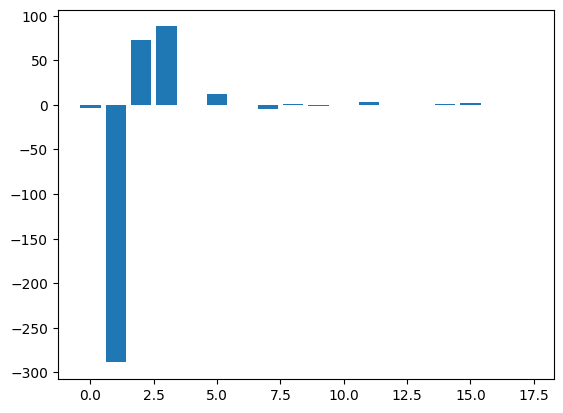

In [170]:
plt.bar(range(len(model.coef_)),model.coef_)

In [171]:
model.coef_

array([-3.13834866e+00, -2.88810466e+02,  7.27963491e+01,  8.79413340e+01,
        9.28197456e-02,  1.25755750e+01,  2.50836345e-01, -4.50092573e+00,
        4.76156273e-01, -1.21673177e+00, -1.17914383e-01,  3.36202259e+00,
        2.26893920e-03, -4.09355463e-01,  1.04971464e+00,  2.43800582e+00,
        4.85468530e-03,  3.32510086e-02])

In [137]:
# slope of the first 100 ticks
ols_res = [ols(np.arange(window_size),x_raw[[col]])['coefficients'][0] for col in x_raw.columns]
window_max_val = x_raw.diff().abs().max().values
change_direction_num = np.sign(x_raw.diff()).sum().values
x = np.concatenate([ols_res,window_max_val,change_direction_num])

In [138]:
x

array([ 1.80750883e+01,  2.12206487e-02,  1.43216080e-01, -3.20140094e-02,
        3.73307995e+01,  1.19574306e+00,  2.50000000e+00,  1.00000000e-01,
        1.00000000e+00,  2.00000000e-01,  5.80300000e-01,  5.89000000e-03,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -9.90000000e+01,  9.90000000e+01])

In [133]:
np.sign(x_raw.diff()).sum()

ORCHIDS           -1.0
TRANSPORT_FEES    -1.0
EXPORT_TARIFF     -1.0
IMPORT_TARIFF     -1.0
SUNLIGHT         -99.0
HUMIDITY          99.0
dtype: float64

In [60]:

def ols(x, y, intercept=False):
    """
    Ordinary least squares regression for multivariate x, including R^2 and residuals.

    Args:
        x (list of lists or numpy.ndarray): 2D list or array where each inner list or
         row represents a single observation's features.
        y (list or numpy.ndarray): Output variable values, one for each observation.
        intercept (bool): Whether to include an intercept in the model. Default is False.
    Returns:
        dict: A dictionary containing coefficients, intercept, R^2, and residuals.
    """
    # Convert inputs to numpy arrays if they aren't already
    x = np.asarray(x)
    y = np.asarray(y)

    # Ensure x is two-dimensional (for a single predictor case, it should still work)
    if x.ndim == 1:
        x = x.reshape(-1, 1)

    if intercept:
        # Augment x with a column of ones for intercept
        X = np.hstack([np.ones((len(x), 1)), x])
    else:
        X = x

    # Compute X'X and X'Y
    XTX = X.T @ X
    XTY = X.T @ y.reshape(-1, 1)

    try:
        # Solve for beta (coefficients)
        beta = np.linalg.solve(XTX, XTY)
        beta = beta.flatten()  # Flatten the array to 1D

        # Calculate fitted values
        y_fitted = X @ beta.reshape(-1, 1)

        # Calculate residuals
        residuals = y.reshape(-1, 1) - y_fitted

        # Calculate R^2
        SS_res = residuals.T @ residuals
        SS_tot = (y.reshape(-1, 1) - np.mean(y)).T @ (y.reshape(-1, 1) - np.mean(y))
        r_squared = 1 - (SS_res / SS_tot).item()  # Extract scalar value
        if intercept:
            return {
                "coefficients": beta[1:],  # coefficients for predictors
                "intercept": beta[0],  # intercept
                "R2": r_squared,  # R^2 value
                "residuals": residuals.flatten(),  # residuals
            }
        else:
            return {
                "coefficients": beta,  # coefficients for predictors
                "R2": r_squared,  # R^2 value
                "residuals": residuals.flatten(),  # residuals
            }
    except np.linalg.LinAlgError:
        raise "Matrix is singular and cannot be inverted."

In [64]:
ols_res = ols(mid_price_all[['CHOCOLATE','STRAWBERRIES','ROSES']],mid_price_all['GIFT_BASKET'])

In [79]:
ols_res = ols(mid_price_all[['CHOCOLATE']],mid_price_all['GIFT_BASKET']-6*mid_price_all['STRAWBERRIES']-mid_price_all['ROSES']-479.490)

<Axes: xlabel='day,timestamp'>

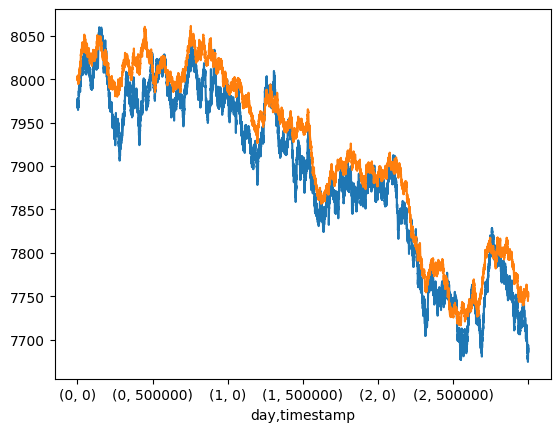

In [88]:
y_hat = ((mid_price_all['GIFT_BASKET']-6*mid_price_all['STRAWBERRIES']-mid_price_all['ROSES']-479.490)/4)
y_hat.plot()
mid_price_all['CHOCOLATE'].plot()

<Axes: xlabel='day,timestamp'>

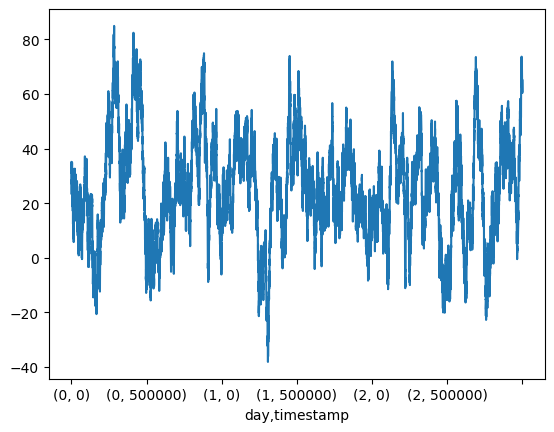

In [92]:
(mid_price_all['CHOCOLATE']-y_hat).plot()

In [94]:
np.corrcoef((mid_price_all['CHOCOLATE']-y_hat),spread)

array([[ 1., -1.],
       [-1.,  1.]])

In [82]:
mid_price_all[['CHOCOLATE']]

product        CHOCOLATE
day timestamp           
0   0             8000.0
    100           8001.5
    200           8001.0
    300           8002.5
    400           8002.0
...                  ...
2   999500        7750.5
    999600        7750.5
    999700        7750.5
    999800        7750.0
    999900        7750.0

[30000 rows x 1 columns]

In [78]:
spread.mean()

379.4904833333333

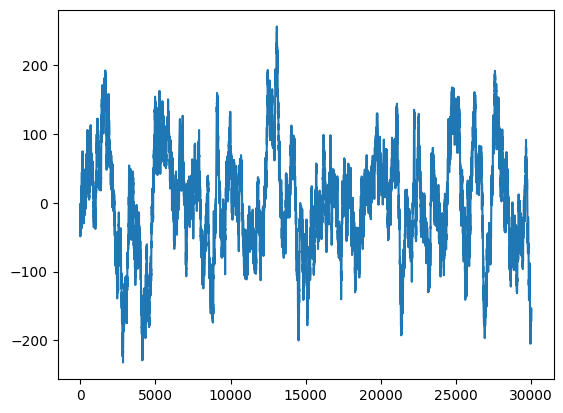

In [68]:
plt.plot(ols_res['residuals'])

<Axes: xlabel='day,timestamp'>

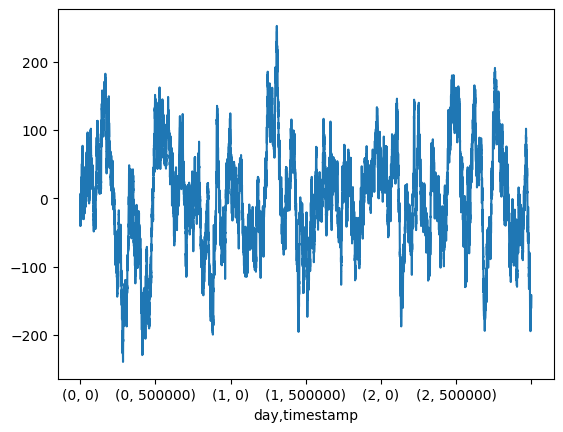

In [71]:
(spread-spread.mean()).plot()

In [63]:
np.corrcoef(component_total,prices[prices['product']=='GIFT_BASKET']['mid_price'])

array([[1.        , 0.99189699],
       [0.99189699, 1.        ]])

<Axes: xlabel='day,timestamp'>

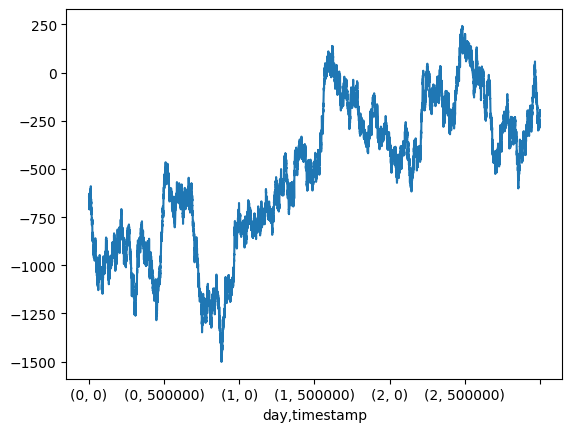

In [49]:
(prices[prices['product']=='GIFT_BASKET']['mid_price']-9*prices[prices['product']=='CHOCOLATE']['mid_price']).plot()

In [47]:
(prices[prices['product']=='GIFT_BASKET']['mid_price']/prices[prices['product']=='CHOCOLATE']['mid_price']).mean()

8.933633868419538